In [37]:
import os
import numpy as np
import pandas as pd
# for plotting
import matplotlib.pyplot as plt
% matplotlib inline

In [23]:
merDSDit = parDir + "\\DataSets\\MergedDataset\\Final.csv"

In [24]:
data = pd.read_csv(merDSDit)

# Check For Missing Values
Let us go ahead and check if any of the variables contain missing values.
You can check that there are no Missing Values

In [11]:
def findAndPrintMissingValues(df):
    # make a list of the variables that contain missing values
    vars_with_na = [var for var in df.columns if df[var].isnull().sum() > 1]
    return vars_with_na
    

In [15]:
# print the variable name and the percentage of missing values
vars_with_na=findAndPrintMissingValues(data)
print(vars_with_na)

None


# Let us analyse the distribution of the numeric variables
We can see that there is lot of variation between minimum and maximum values of most of the variables

In [34]:
num_vars = [var for var in data.columns if data[var].dtypes != 'int64']
pd.options.display.float_format = '{:.1f}'.format
data[num_vars].describe()

,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed
count,16154418.0,16154418.0,16154418.0,16154418.0,16154418.0,16154418.0,16154418.0,16154418.0,16154418.0,16154418.0
mean,11.6,169.0,0.1,4.5,0.9,-0.0,0.0,-0.0,3799.9,9.0
std,86.9,107.3,1.4,8.1,3.3,0.1,0.3,0.1,1435847.7,8.1
min,0.8,0.0,-78.4,-73.0,-78.4,-48.5,-74.9,-53.6,0.0,-2.0
25%,3.9,78.0,-0.5,-2.1,-0.9,-0.0,-0.0,-0.0,241.0,1.0
50%,4.3,169.0,0.1,9.1,0.8,-0.0,0.0,-0.0,520.0,7.5
75%,8.0,263.0,0.6,9.7,2.7,0.0,0.0,0.0,863.0,15.5
max,6070.1,360.0,66.9,75.1,78.1,39.8,80.3,66.3,1495796757.0,148.0


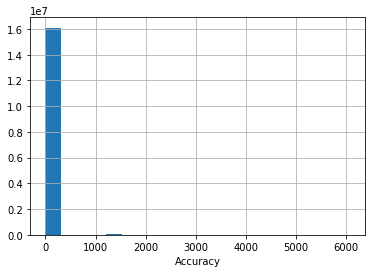

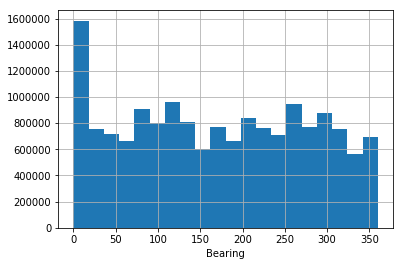

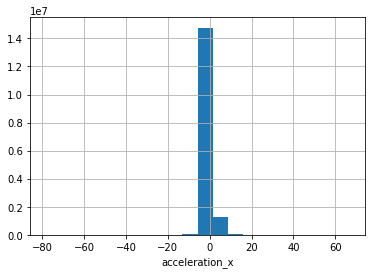

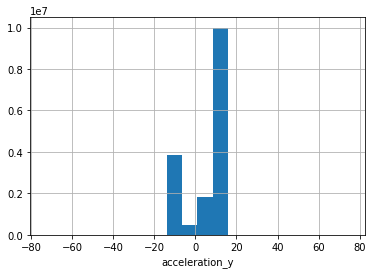

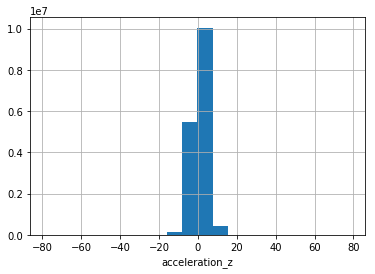

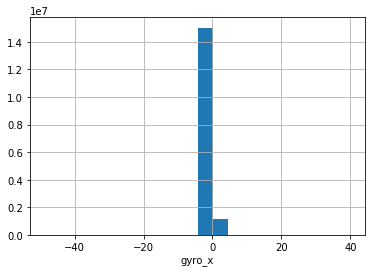

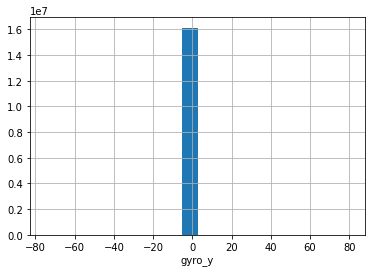

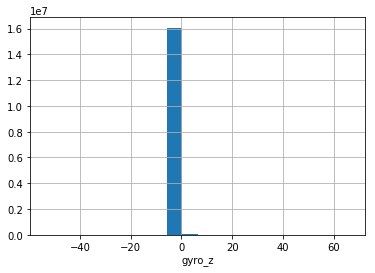

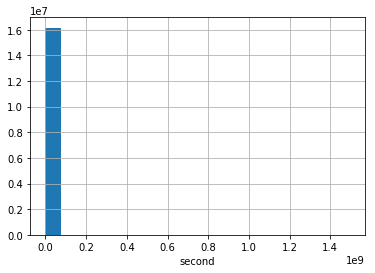

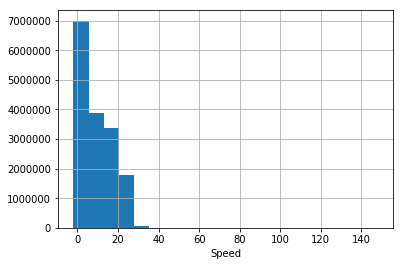

In [39]:
#Let us go ahead and plot the distributions of these variables
def analyse_continuos(df,var):
    df = df.copy()
    df[var].hist(bins=20)
    plt.xlabel(var)
    plt.show()
for var in num_vars:
    analyse_continuos(data, var)


# The distributions are not normal and linear models do not work well with skewed distributions
We will try to apply Log transformations and sqrt transformation as part of our pre processing pipeline to apply transformations.


# Let us check for outliers

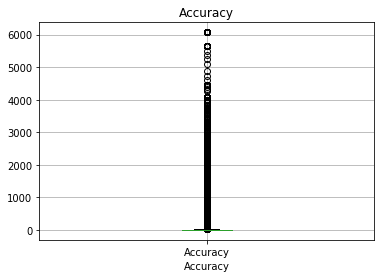

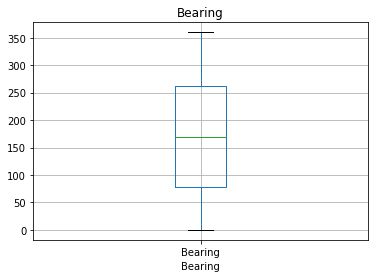

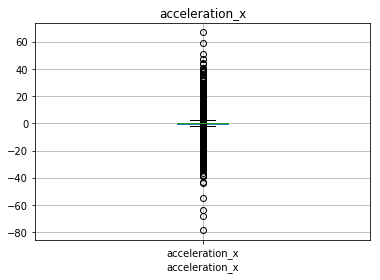

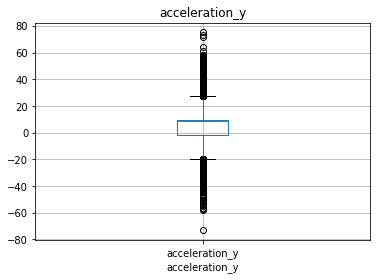

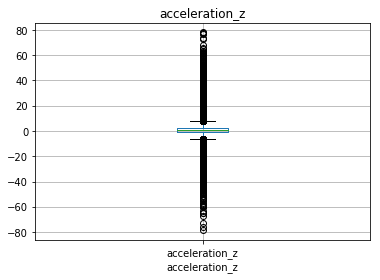

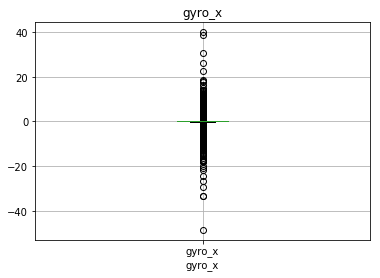

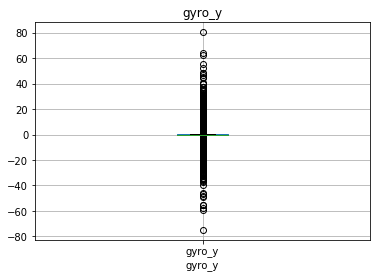

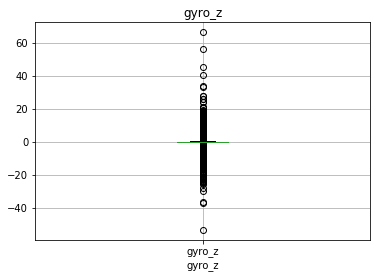

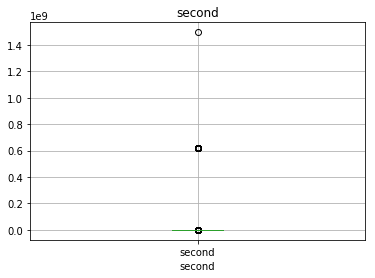

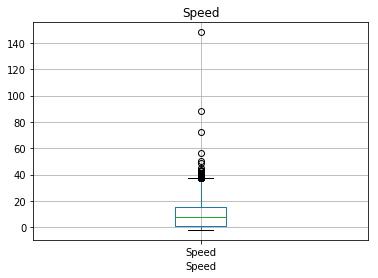

In [41]:
def find_outliers(df,var):
    df = df.copy()
    df.boxplot(var)
    plt.title(var)
    plt.xlabel(var)
    plt.show()
for var in num_vars:
    find_outliers(data,var)

# The majority of the continuous variables seem to contain outliers. Outliers tend to affect the performance of linear model. So it is worth spending some time understanding if removing outliers will add performance value to our final machine learning model.

# Let us check for class Imbalance on the target variable

In [42]:
data['label'].value_counts()

0    11215547
1     4938871
Name: label, dtype: int64

# There is clearly class imbalance and we need to find a way to tackle it.As the algorithms we might apply tend to be skewed towards majority class
